# Sleep Wake Dynamics  Prior and After Exposure to Chronic Stress

# Abstract

We showed in our previous publication how sleep disturbances prior to exposure to chronic stress can predict the vulnerability to stress.  The following evidence was extracted from our data:

(a) Decrease in NREM average bout duration in Stress-Susceptible mice pre- and post-chronic stress

(b) Increase in number of transitions between NREM and Wake states in Stress-Susceptible mice pre- and post-chronic stress. (a) & (b) can be summarized as increased NREM sleep fragmentation in susceptible mice.

(c) Increase in number of transitions between NREM and Wake states and decreased average bout duration of NREM in resilient mice post exposure to stress

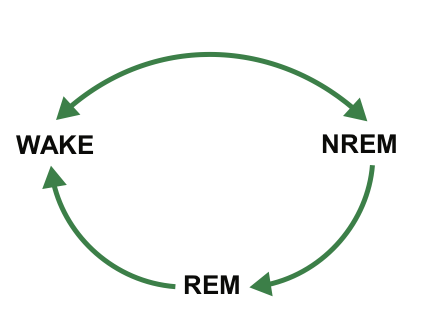

# Aim of the current investigation
By leveraging the statistical properties of the sleep and wake bouts distribution (exponential and power law respectively) and by stratifying the bouts based on their transitions, one could gain valuable insights into the network properties and dynamics in order to plan the next step of neural circuit-based investigation. 

# The state transitions we are focusing on:

1. NREM to Wake
2. NREM to REM

3. REM from NREM

4. Wake from NREM
5. Wake from REM

Other state transitions are rare and can be safely ignored in our analysis.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm
import glob
import os

from sklearn import linear_model
from lifelines import KaplanMeierFitter

os.chdir('/Users/bmr225/Documents/PythonCodes/Survival_Data')

In [193]:
# To hide all the warnings in Python
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
#mpl.rcParams['figure.figsize'] = 8,8 # to fix the figure size
#matplotlib.rcParams['figure.dpi'] = 64
sns.set_style('whitegrid') 
# Default settings
mpl.rcParams['image.cmap'] = 'jet'
sns.set()

In [3]:
# List of functions used to plot the distributions
def load_data(phenotype,phase,condition):
    df = pd.read_csv(phenotype + "_"+ phase + "_" + condition + "_grouped.csv")
    return df

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

def grouping_data(df,direction,measure):
    if direction == 'To':
       df_res = df.groupby(['State_Label','Transition_to_label'])[measure].apply(list)
    elif direction =='From':
        df_res = df.groupby(['State_Label','Transition_from_label'])[measure].apply(list)
    else:
        df_res = df.groupby('State_Label')[measure].apply(list)
    return df_res

#Transition To: N-W, N-R, R-W, W-R... , from: WfN, WfR, NfR, NfW, 
def extract_list(df,state,transition): # df here is grouped.. 
    if transition =='None':
       l_res = df[state]
    else:
       l_res = df[state][transition]
    return l_res

######################################################################################################################
# Plotting functions

# Plotting ECDF
def plt_phenotypes_per_phase_cond(phenotype,phase, condition,state, direction, transition,measure):   
    # load, group, extract the list of interest
    df = load_data(phenotype,phase,condition)    
    df_grouped = grouping_data(df,direction,measure) 
    l_ = extract_list(df_grouped,state,transition) 
    X,Y = ecdf(l_)   
    # plot command
    _ = plt.xlabel('Duration [s]')
    _ = plt.ylabel('Cumulative Probability')
    _ = plt.plot(X,Y,marker='.',linestyle = 'none',label = phenotype)

    
# Plotting Distribution PDF
def plt_distribution_phenotypes_per_phase_cond(phenotype,phase, condition,state, direction, transition,measure):   
    # load, group, extract the list of interest
    df = load_data(phenotype,phase,condition)    
    df_grouped = grouping_data(df,direction,measure) 
    l_ = extract_list(df_grouped,state,transition) 
    sns.distplot(l_,label = phenotype)   
    # plot command
    _ = plt.xlabel('Duration [s]')
    _ = plt.ylabel('Probability')
   

    
    
# to loop over the 3 phenotypes
def plt_loop_over_phenotype(phase, condition,state, direction, transition,measure):
    for phenotype in ['Susceptible','Resilient','Control']:
        plt_phenotypes_per_phase_cond(phenotype,phase,condition,state, direction, transition,measure)
        plt.title(condition + "-" + "-" + phase + "-"+ transition)
        plt.legend(loc = 'lower right')
    
    
# to loop over the 3 phenotypes_ plot distribution
def plt_loop_over_phenotype_dist(phase, condition,state, direction, transition,measure):
    for phenotype in ['Susceptible','Resilient','Control']:
        plt_distribution_phenotypes_per_phase_cond(phenotype,phase,condition,state, direction, transition,measure)
        plt.title(condition + "-" + "-" + phase + "-"+ transition)
        plt.legend(loc = 'lower right')
        plt.xlim((0,500))
     

In [4]:
def list_phenotypes_per_phase_cond(phenotype,phase, condition,state, direction, transition,measure):   
    # load, group, extract the list of interest
        df = load_data(phenotype,phase,condition)    
        df_grouped = grouping_data(df,direction,measure) 
        l_ = extract_list(df_grouped,state,transition) 
        return l_

### Non Parametric Statistical Tests: Kolmogorov-Smirnov Test

In [5]:
# Non parametric Statistical Testing: Kolmogorov-Smirnoff Test
from scipy.stats import ks_2samp
def compute_KS_2samp_test(state, direction, phase,condition, transition,measure):
        
    l_Susceptible = list_phenotypes_per_phase_cond(phenotype ='Susceptible', phase=phase, condition = condition,state = state, direction=direction, transition=transition,measure=measure)
    l_Resilient = list_phenotypes_per_phase_cond(phenotype ='Resilient', phase=phase, condition = condition,state = state, direction=direction, transition=transition,measure=measure)
    l_Control = list_phenotypes_per_phase_cond(phenotype ='Control', phase=phase, condition = condition,state = state, direction=direction, transition=transition,measure=measure)
    

    print('Kolmogorov-Smirnov test for '+ phase + ' ' + condition)
    print('Between Susceptible, Resilient {}'.format(ks_2samp(l_Susceptible, l_Resilient)))
    print('Between Control, Resilient {}'.format(ks_2samp(l_Control, l_Resilient)))
    print('Between Susceptible, Control {}'.format(ks_2samp(l_Susceptible, l_Control)))
        

# The Cumulative Distribution Function of Vigilance States

### REM states transitioning from NREM ( The vast majority of REM states)

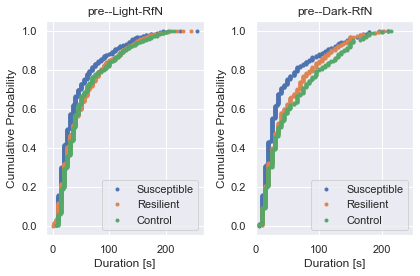

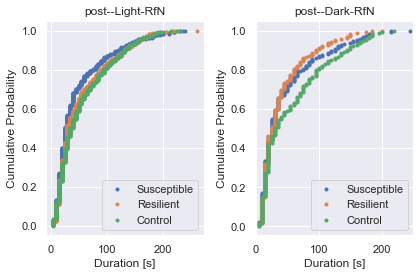

In [6]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'From'
state = 'REM'
transition = 'RfN'
measure = 'Duration'

for c in condition:
    i = 1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plt_loop_over_phenotype(p, c,state, direction, transition,measure)
        i+=1
    plt.tight_layout()  
    plt.xlim([0,250])
    plt.show()      

In [7]:
#Statistical Testing
from scipy.stats import ks_2samp
# Light Pre
##########
phase = ['Light','Dark']
condition = ['pre','post']
direction = 'From'
state = 'REM'
transition = 'RfN'
measure = 'Duration'


for c in condition:
    for p in phase:
        compute_KS_2samp_test(state, direction, p,c, transition,measure)

Kolmogorov-Smirnov test for Light pre
Between Susceptible, Resilient Ks_2sampResult(statistic=0.10894608693353948, pvalue=0.0027569102025022385)
Between Control, Resilient Ks_2sampResult(statistic=0.05862433204921089, pvalue=0.3033370018753667)
Between Susceptible, Control Ks_2sampResult(statistic=0.13883645325363117, pvalue=0.00017100913673062657)
Kolmogorov-Smirnov test for Dark pre
Between Susceptible, Resilient Ks_2sampResult(statistic=0.15443817692612372, pvalue=0.00019365633326917653)
Between Control, Resilient Ks_2sampResult(statistic=0.060984484615608535, pvalue=0.5630373179033593)
Between Susceptible, Control Ks_2sampResult(statistic=0.17604161679991065, pvalue=3.338157172405598e-05)
Kolmogorov-Smirnov test for Light post
Between Susceptible, Resilient Ks_2sampResult(statistic=0.09222723393880287, pvalue=0.007881593793397701)
Between Control, Resilient Ks_2sampResult(statistic=0.05993907083015994, pvalue=0.2461032443966652)
Between Susceptible, Control Ks_2sampResult(statistic

### NREM states transitioning to Wake

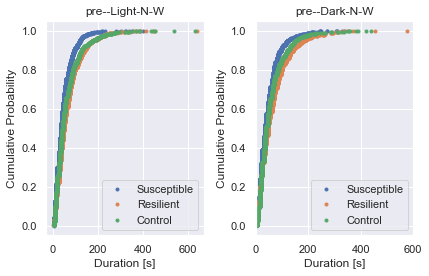

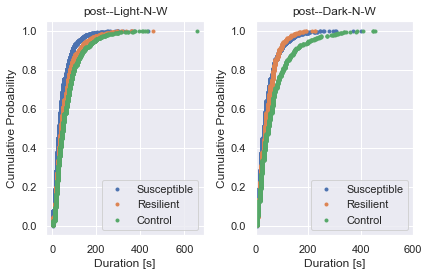

In [8]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'To'
state = 'NREM'
transition = 'N-W'
measure = 'Duration'

for c in condition:
    i = 1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plt_loop_over_phenotype(p, c,state, direction, transition,measure)
        i+=1
    plt.tight_layout() 
    plt.xlim([0,600])
    plt.show()      

#### Kolmogorov-Smirnov Statistical Test 

In [9]:
#Statistical Testing
from scipy.stats import ks_2samp
# Light Pre
##########
phase = ['Light','Dark']
condition = ['pre','post']
direction = 'To'
state = 'NREM'
transition = 'N-W'
measure = 'Duration'


for c in condition:
    for p in phase:
        compute_KS_2samp_test(state, direction, p,c, transition,measure)

Kolmogorov-Smirnov test for Light pre
Between Susceptible, Resilient Ks_2sampResult(statistic=0.15196192851743504, pvalue=4.52049508936625e-12)
Between Control, Resilient Ks_2sampResult(statistic=0.05947419646441454, pvalue=0.005244099931707602)
Between Susceptible, Control Ks_2sampResult(statistic=0.10130828655097326, pvalue=6.723638534822385e-09)
Kolmogorov-Smirnov test for Dark pre
Between Susceptible, Resilient Ks_2sampResult(statistic=0.13724721447592475, pvalue=6.327605106548617e-12)
Between Control, Resilient Ks_2sampResult(statistic=0.07404655931283835, pvalue=0.00224685845170014)
Between Susceptible, Control Ks_2sampResult(statistic=0.07342999617160885, pvalue=0.00022175597885731868)
Kolmogorov-Smirnov test for Light post
Between Susceptible, Resilient Ks_2sampResult(statistic=0.11884056267247446, pvalue=1.5731936831020477e-07)
Between Control, Resilient Ks_2sampResult(statistic=0.08367622202113674, pvalue=1.887031243363868e-05)
Between Susceptible, Control Ks_2sampResult(stat

### NREM states transitioning to REM

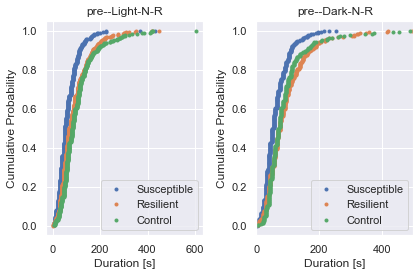

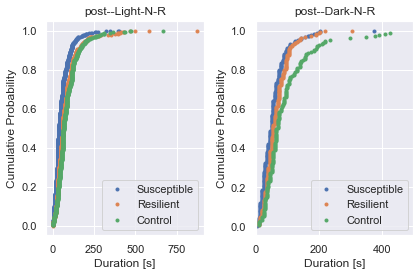

In [10]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'To'
state = 'NREM'
transition = 'N-R'
measure = 'Duration'

for c in condition:
    i = 1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plt_loop_over_phenotype(p, c,state, direction, transition,measure)
        i+=1
    plt.tight_layout() 
    plt.xlim([0,500])
    plt.show()      

#### Kolmogorov-Smirnov Statistical Test 

In [11]:
#Statistical Testing
from scipy.stats import ks_2samp
# Light Pre
##########
phase = ['Light','Dark']
condition = ['pre','post']
direction = 'To'
state = 'NREM'
transition = 'N-R'
measure = 'Duration'


for c in condition:
    for p in phase:
        compute_KS_2samp_test(state, direction, p,c, transition,measure)

Kolmogorov-Smirnov test for Light pre
Between Susceptible, Resilient Ks_2sampResult(statistic=0.19180616536335734, pvalue=2.834208645552394e-09)
Between Control, Resilient Ks_2sampResult(statistic=0.09983706833464508, pvalue=0.008990730314495043)
Between Susceptible, Control Ks_2sampResult(statistic=0.28884169681715693, pvalue=3.3306690738754696e-16)
Kolmogorov-Smirnov test for Dark pre
Between Susceptible, Resilient Ks_2sampResult(statistic=0.22052938525205895, pvalue=1.3123148345783875e-08)
Between Control, Resilient Ks_2sampResult(statistic=0.07229839218311841, pvalue=0.3506028719774662)
Between Susceptible, Control Ks_2sampResult(statistic=0.21618236073212377, pvalue=1.2557355366649148e-07)
Kolmogorov-Smirnov test for Light post
Between Susceptible, Resilient Ks_2sampResult(statistic=0.23849323418261612, pvalue=9.992007221626409e-16)
Between Control, Resilient Ks_2sampResult(statistic=0.07303884234577304, pvalue=0.09050802600209751)
Between Susceptible, Control Ks_2sampResult(stati

### Wake states transitioning from NREM

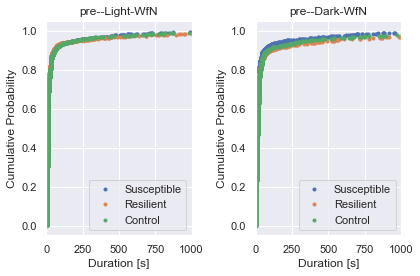

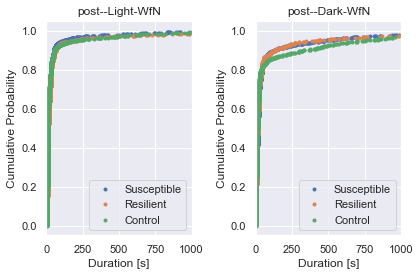

In [12]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'From'
state = 'Wake'
transition = 'WfN'
measure = 'Duration'

for c in condition:
    i = 1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plt_loop_over_phenotype(p, c,state, direction, transition,measure)
        i+=1
        plt.xlim([0,1000])
        plt.tight_layout() 
    plt.show()      

#### Kolmogorov-Smirnov Statistical Test 

In [13]:
#Statistical Testing
from scipy.stats import ks_2samp
# Light Pre
##########
phase = ['Light','Dark']
condition = ['pre','post']
direction = 'From'
state = 'NREM'
transition = 'NfR'
measure = 'Duration'


for c in condition:
    for p in phase:
        compute_KS_2samp_test(state, direction, p,c, transition,measure)

Kolmogorov-Smirnov test for Light pre
Between Susceptible, Resilient Ks_2sampResult(statistic=0.17261904761904762, pvalue=0.6908897401965348)
Between Control, Resilient Ks_2sampResult(statistic=0.2761904761904762, pvalue=0.48738468088135445)
Between Susceptible, Control Ks_2sampResult(statistic=0.3333333333333333, pvalue=0.33635723041598864)
Kolmogorov-Smirnov test for Dark pre
Between Susceptible, Resilient Ks_2sampResult(statistic=0.7272727272727273, pvalue=0.0010319917440663184)
Between Control, Resilient Ks_2sampResult(statistic=0.4772727272727273, pvalue=0.40805860805860816)
Between Susceptible, Control Ks_2sampResult(statistic=0.2857142857142857, pvalue=0.9163398692810458)
Kolmogorov-Smirnov test for Light post
Between Susceptible, Resilient Ks_2sampResult(statistic=0.20555555555555555, pvalue=0.1089482747587357)
Between Control, Resilient Ks_2sampResult(statistic=0.19684684684684683, pvalue=0.28880615142019395)
Between Susceptible, Control Ks_2sampResult(statistic=0.345345345345

### Wake states transitioning from REM

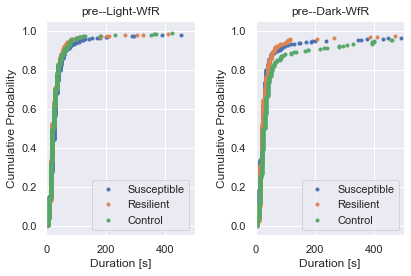

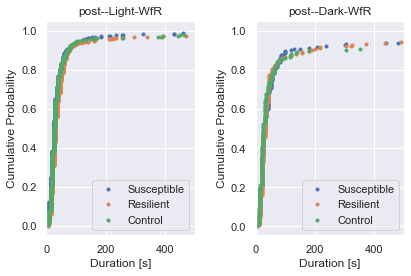

In [14]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'From'
state = 'Wake'
transition = 'WfR'
measure = 'Duration'

for c in condition:
    i = 1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plt_loop_over_phenotype(p, c,state, direction, transition,measure)
        i+=1
        plt.xlim([0,500])
        plt.tight_layout() 
    plt.show()      

#### Kolmogorov-Smirnov Statistical Test 

In [15]:
#Statistical Testing
from scipy.stats import ks_2samp
# Light Pre
##########
phase = ['Light','Dark']
condition = ['pre','post']
direction = 'From'
state = 'NREM'
transition = 'NfR'
measure = 'Duration'


for c in condition:
    for p in phase:
        compute_KS_2samp_test(state, direction, p,c, transition,measure)

Kolmogorov-Smirnov test for Light pre
Between Susceptible, Resilient Ks_2sampResult(statistic=0.17261904761904762, pvalue=0.6908897401965348)
Between Control, Resilient Ks_2sampResult(statistic=0.2761904761904762, pvalue=0.48738468088135445)
Between Susceptible, Control Ks_2sampResult(statistic=0.3333333333333333, pvalue=0.33635723041598864)
Kolmogorov-Smirnov test for Dark pre
Between Susceptible, Resilient Ks_2sampResult(statistic=0.7272727272727273, pvalue=0.0010319917440663184)
Between Control, Resilient Ks_2sampResult(statistic=0.4772727272727273, pvalue=0.40805860805860816)
Between Susceptible, Control Ks_2sampResult(statistic=0.2857142857142857, pvalue=0.9163398692810458)
Kolmogorov-Smirnov test for Light post
Between Susceptible, Resilient Ks_2sampResult(statistic=0.20555555555555555, pvalue=0.1089482747587357)
Between Control, Resilient Ks_2sampResult(statistic=0.19684684684684683, pvalue=0.28880615142019395)
Between Susceptible, Control Ks_2sampResult(statistic=0.345345345345

By plotting the cumulative distribution function of the following states: (1) NREM to Wake (2) NREM to REM (3) REM from NREM (4) Wake from NREM (5) Wake from REM, the following observations are made:
- Susceptible Mice: the distribution of state "NREM" to REM and "REM" from NREM are shifted to the left: higher probability of shorter state duration, pre- and post- stress during light and dark in comparison to control and/or resilient
- Susceptible Mice : the distribution of state "NREM" to wake is shifted to the left as well: higher probability of shorter state duration, pre-and post stress, during light and dark in comparison to one or both other phenotypes
- Resilient Mice: post chronic stress, during the light, only "NREM" to wake distribution shifted slightly to the left, or towards higher probability of shorter bouts duration. Both "NREM" to REM and "REM" to wake distribution were "resilient" post stress exposure. In other words, they remain shifted to the right relative to the distribution of the susceptible and similar to the distribution of stress-naive(control) mice. During the dark, however, the picture changed: the distribution of "NREM" to wake, "NREM" to REM and "REM" to wake shifted to the left, similar to the susceptible mice. 
- The distribution of the wake states, "Wake" from REM and "Wake" from NREM is comparable among all phenotypes.

### Violin Plot of average bout duration

In [16]:
def plot_violin(phase,condition,state,direction, transition,measure):
    
    dur_dict = {}

    l_Susceptible = list_phenotypes_per_phase_cond(phenotype ='Susceptible', phase=phase, condition = condition,state = state, direction=direction, transition=transition,measure=measure)
    l_Resilient = list_phenotypes_per_phase_cond(phenotype ='Resilient', phase=phase, condition = condition,state = state, direction=direction, transition=transition,measure=measure)
    l_Control = list_phenotypes_per_phase_cond(phenotype ='Control', phase=phase, condition = condition,state = state, direction=direction, transition=transition,measure=measure)

    dur_dict = {'Duration':l_Susceptible + l_Resilient + l_Control,
                'phenotype':['S']*len(l_Susceptible) + ['R']*len(l_Resilient) + ['C']*len(l_Control)}

    df_dur = pd.DataFrame.from_dict(dur_dict, orient='index').T

    sns.set(style = 'white')
    #ax = sns.boxplot(data = df_dur, x = 'phenotype', y = 'Duration', hue = 'phenotype')
    ax = sns.swarmplot(data = df_dur,    x = 'phenotype', y = 'Duration', hue = 'phenotype')
    plt.title(condition + "-" + "-" + phase + "-"+ transition)
    ax.legend_.remove()

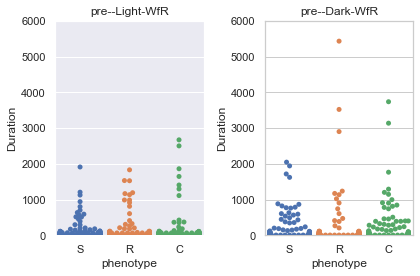

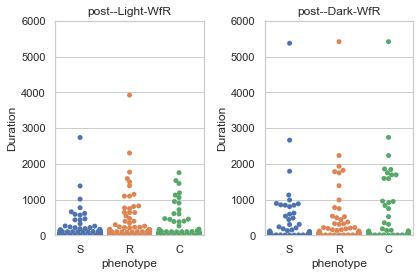

In [17]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'From'
state = 'Wake'
transition = 'WfR'
measure = 'Duration'


for c in condition:
    i = 1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plot_violin(p, c,state, direction, transition,measure)
        i+=1
        plt.tight_layout() 
        plt.ylim([0,6000])
    plt.show()      

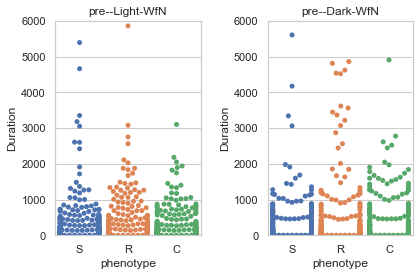

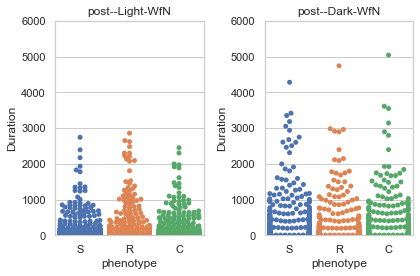

In [18]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'From'
state = 'Wake'
transition = 'WfN'
measure = 'Duration'


for c in condition:
    i = 1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plot_violin(p, c,state, direction, transition,measure)
        i+=1
        plt.tight_layout() 
        plt.ylim([0,6000])
    plt.show()      


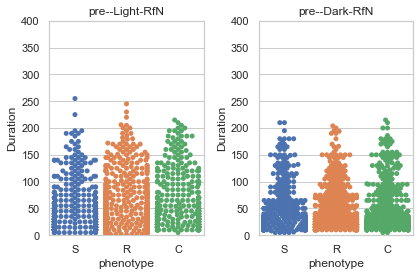

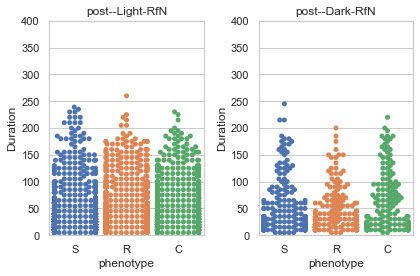

In [19]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'From'
state = 'REM'
transition = 'RfN'
measure = 'Duration'


for c in condition:
    i = 1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plot_violin(p, c,state, direction, transition,measure)
        i+=1
        plt.tight_layout() 
        plt.ylim([0,400])
    plt.show()      



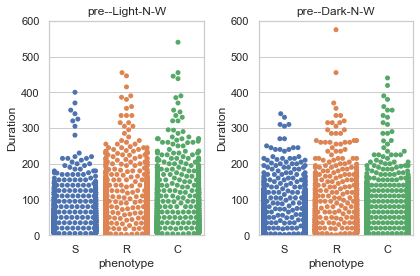

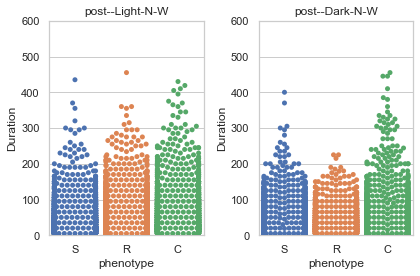

In [20]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'To'
state = 'NREM'
transition = 'N-W'
measure = 'Duration'


for c in condition:
    i = 1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plot_violin(p, c,state, direction, transition,measure)
        i+=1
        plt.tight_layout() 
        plt.ylim([0,600])
    plt.show()      


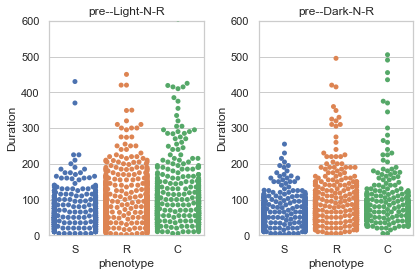

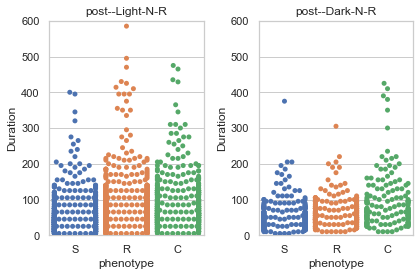

In [21]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'To'
state = 'NREM'
transition = 'N-R'
measure = 'Duration'


for c in condition:
    i = 1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plot_violin(p, c,state, direction, transition,measure)
        i+=1
        plt.tight_layout() 
        plt.ylim([0,600])
    plt.show()      


# These findings can be summarized as following:  
- There is an increased competition from the wake circuitry in the suceptible mice pre-and post- exposure to stress. Such heightened competition leads to increased occurrence of shorter "NREM"to wake, "NREM"to REM and "REM"to wake bouts duration. In other words, NREM state and REM state switch 'earlier" to Wake state. Even when NREM switches to REM state, the increased competition from the wake circuitry leads to increased switching from the sleep (NREM then REM) to wake and therefore the sleep (NREM state followed by REM state) switch 'earlier' to Wake state.

- There is an increased competition from the wake circuitry in the resilient mice post exposure to stress during the dark as there is a shift in the distribution of duration of the "NREM"to wake, "NREM"to REM and "REM"to wake bouts to the left.

It is worth mentioning that the distribution of the Wake states, "Wake" from REM and "Wake" from NREM is more or less comparable between the phenotypes. 


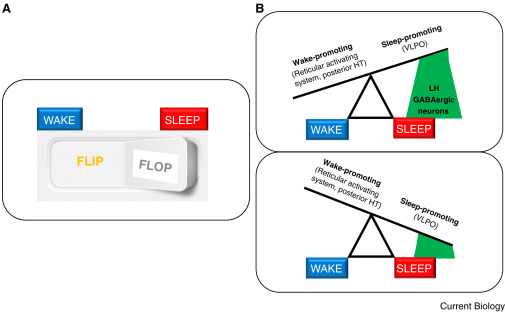

From: https://www.sciencedirect.com/science/article/pii/S096098221630700X


# Markov Model
Aim: To model the sequence of sleep and wake states sequence

Markov analysis provides the estimates of the probablity of staying in one state i.e., state stability and of transition probabilities from and to that state (Perez-Atencio, 2018)

In [22]:
os.chdir('/Users/bmr225/Documents/PythonCodes/Survival_Data')

In [23]:
def load_markov_trans_matrix(phenotype,condition,phase):
    filename = 'Markov_seq_'+ phenotype + condition + phase+'_transition_matrix.csv'
    df = pd.read_csv(filename)
    df = df.iloc[:,1:4]
    df.rename({'V1':'NREM','V2':'REM','V3':'Wake'}, axis =1, inplace = True)
    df.index = df.columns.values
    
    return df
    

In [24]:
def load_markov_trans_sd_matrix(phenotype,condition,phase):
    filename = phenotype + condition + phase+'_transition_sd_matrix.csv'
    df = pd.read_csv(filename)
    df = df.iloc[:,1:4]
    df.rename({'V1':'NREM','V2':'REM','V3':'Wake'}, axis =1, inplace = True)
    df.index = df.columns.values
    
    return df

### Pre exposure to chronic social stress

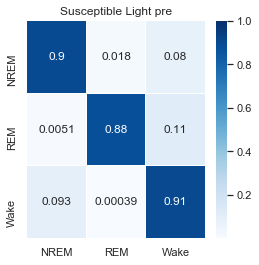

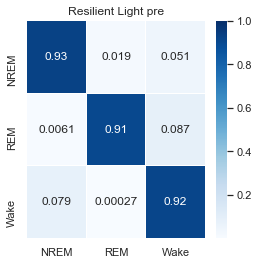

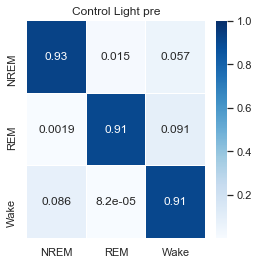

In [25]:
phenotype = ['Susceptible','Resilient','Control']

phase = 'Light'
condition ='pre'
colormap = sns.diverging_palette(10,220,as_cmap = True)



for ph in phenotype:
    
    
  
    df = load_markov_trans_matrix(ph,condition,phase)
    plt.figure(figsize=(4,4))
    
    sns.heatmap(df, 
            cmap = "Blues",
            annot = True,
           linewidths = 0.1, vmax = 1.0, linecolor='white',
           annot_kws = {'fontsize':12})
    plt.title(ph +' '+ phase +' '+ condition)
    
plt.show()      



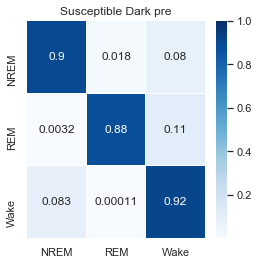

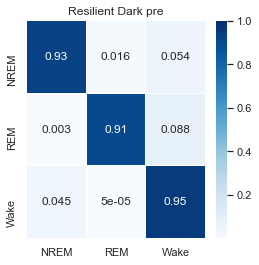

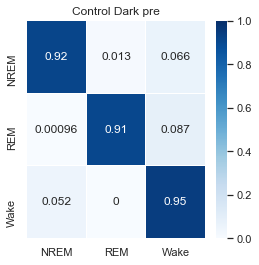

In [26]:
phenotype = ['Susceptible','Resilient','Control']

phase = 'Dark'
condition ='pre'
colormap = sns.diverging_palette(10,220,as_cmap = True)



for ph in phenotype:
    
    
  
    df = load_markov_trans_matrix(ph,condition,phase)
    plt.figure(figsize=(4,4))
    
    sns.heatmap(df, 
            cmap = "Blues",
            annot = True,
           linewidths = 0.1, vmax = 1.0, linecolor='white',
           annot_kws = {'fontsize':12})
    plt.title(ph +' '+ phase +' '+ condition)
    
plt.show()      



#### Post Exposure to Chronic Stress

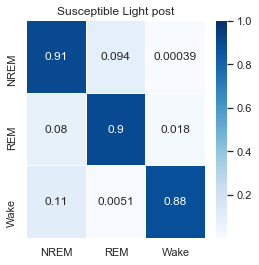

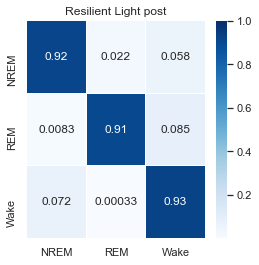

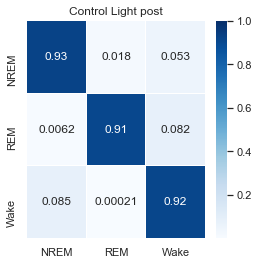

In [27]:
phenotype = ['Susceptible','Resilient','Control']

phase = 'Light'
condition ='post'
colormap = sns.diverging_palette(10,220,as_cmap = True)



for ph in phenotype:
    
      
    df = load_markov_trans_matrix(ph,condition,phase)
    plt.figure(figsize=(4,4))
    
    sns.heatmap(df, 
            cmap = "Blues",
            annot = True,
           linewidths = 0.1, vmax = 1.0, linecolor='white',
           annot_kws = {'fontsize':12})
    plt.title(ph +' '+ phase +' '+ condition)
    
plt.show()      



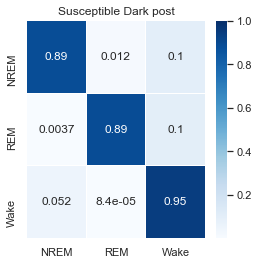

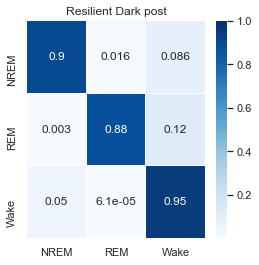

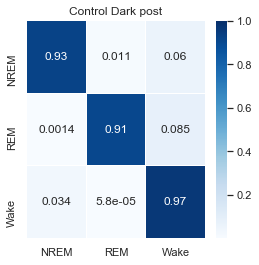

In [28]:
phenotype = ['Susceptible','Resilient','Control']

phase = 'Dark'
condition ='post'
colormap = sns.diverging_palette(10,220,as_cmap = True)



for ph in phenotype:
    
    df = load_markov_trans_matrix(ph,condition,phase)
    plt.figure(figsize=(4,4))
    
    sns.heatmap(df, 
            cmap = "Blues",
            annot = True,
           linewidths = 0.1, vmax = 1.0, linecolor='white',
           annot_kws = {'fontsize':12})
    plt.title(ph +' '+ phase +' '+ condition)
    
plt.show()      

### Qualitative and Quantitative Analyses of the three State Markov Model

In [29]:
def print_ttest(x,y,n_s,n_r, n_c):
    # S vs R
    print('t test between susceptible and resilient :{}'.format(ttest_ind_from_stats(mean1=mean_transition_susc_df.iloc[x,y], std1=sd_transition_susc_df.iloc[x,y], nobs1=n_s,
                    mean2=mean_transition_res_df.iloc[x,y], std2=sd_transition_res_df.iloc[x,y], nobs2=n_r)))
    #S vs C
    print('t test between susceptible and control :{}'.format(ttest_ind_from_stats(mean1=mean_transition_susc_df.iloc[x,y], std1=sd_transition_susc_df.iloc[x,y], nobs1=n_s,
                    mean2=mean_transition_cont_df.iloc[x,y], std2=sd_transition_cont_df.iloc[x,y], nobs2=n_c)))

    # R vs C
    print('t test between resilient and control :{}'.format(ttest_ind_from_stats(mean1=mean_transition_res_df.iloc[x,y], std1=sd_transition_res_df.iloc[x,y], nobs1=n_r,
                    mean2=mean_transition_cont_df.iloc[x,y], std2=sd_transition_cont_df.iloc[x,y], nobs2=n_c)))

    return


#### Pre Light

In [30]:
from scipy.stats import ttest_ind_from_stats
# Stability of NREM: N-N is lower in S 
condition = 'pre'
phase = 'Light'
n_s = 7
n_r = 8
n_c = 7

phenotype = 'Susceptible'
mean_transition_susc_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_susc_df = load_markov_trans_sd_matrix(phenotype,condition,phase)


phenotype = 'Resilient'
mean_transition_res_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_res_df = load_markov_trans_sd_matrix(phenotype,condition,phase)



phenotype = 'Control'
mean_transition_cont_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_cont_df = load_markov_trans_sd_matrix(phenotype,condition,phase)



# NREM stability by comparing N-N prob across phenotypes m[0,0]
print('NREM stability: probability of staying in NREM state')
x = 0
y = 0

print_ttest(x,y,n_s,n_r, n_c)

# REM stability by comparing R- R prob across phenotypes m[1,1]
print('REM stability: probability of staying in NREM state')
x = 1
y = 1
print_ttest(x,y,n_s,n_r, n_c)


# Wake stability by comparing R- R prob across phenotypes m[2,2]
print('Wake stability: probability of staying in NREM state')
x = 2
y = 2
print_ttest(x,y,n_s,n_r, n_c)


# NREM transition to Wake probability by comparing N-W across phenotypes prob m[0,2]
print('NREM transition to Wake probability ')

x = 0
y = 2
print_ttest(x,y,n_s,n_r, n_c)

# NREM transition to REM probability by comparing N-W across phenotypes prob m[0,2]
print('NREM transition to REM probability ')

x = 0
y = 1
print_ttest(x,y,n_s,n_r, n_c)



# Wake transition to NREM probability by comparing N-W across phenotypes prob m[2,0]
x = 2
y = 0
print('Wake transition to NREM probability ')
print_ttest(x,y,n_s,n_r, n_c)


# REM transition to Wake probability by comparing N-W across phenotypes prob m[1,2]
x = 2
y = 0
print('Wake transition to NREM probability ')
print_ttest(x,y,n_s,n_r, n_c)



NREM stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=-3.509570785182524, pvalue=0.0038428770749857535)
t test between susceptible and control :Ttest_indResult(statistic=-2.4246187371016767, pvalue=0.03204600325259607)
t test between resilient and control :Ttest_indResult(statistic=0.2598345526963561, pvalue=0.7990610596159372)
REM stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=-1.817511048574663, pvalue=0.09225111986399899)
t test between susceptible and control :Ttest_indResult(statistic=-1.7584142450869549, pvalue=0.10412844274041232)
t test between resilient and control :Ttest_indResult(statistic=-0.10932497090047665, pvalue=0.9146142905165757)
Wake stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=-1.0121417893126265, pvalue=0.32993859824507366)
t test between susceptible and contro

#### Pre Dark

In [31]:
# Stability of NREM: N-N is lower in S 
condition = 'pre'
phase = 'Dark'
n_s = 7
n_r = 7
n_c = 7

phenotype = 'Susceptible'
mean_transition_susc_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_susc_df = load_markov_trans_sd_matrix(phenotype,condition,phase)


phenotype = 'Resilient'
mean_transition_res_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_res_df = load_markov_trans_sd_matrix(phenotype,condition,phase)



phenotype = 'Control'
mean_transition_cont_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_cont_df = load_markov_trans_sd_matrix(phenotype,condition,phase)



# NREM stability by comparing N-N prob across phenotypes m[0,0]
print('NREM stability: probability of staying in NREM state')
x = 0
y = 0

print_ttest(x,y,n_s,n_r, n_c)

# REM stability by comparing R- R prob across phenotypes m[1,1]
print('REM stability: probability of staying in NREM state')
x = 1
y = 1
print_ttest(x,y,n_s,n_r, n_c)


# Wake stability by comparing R- R prob across phenotypes m[2,2]
print('Wake stability: probability of staying in NREM state')
x = 2
y = 2
print_ttest(x,y,n_s,n_r, n_c)



# NREM transition to Wake probability by comparing N-W across phenotypes prob m[0,2]
print('NREM transition to Wake probability ')

x = 0
y = 2
print_ttest(x,y,n_s,n_r, n_c)

# NREM transition to REM probability by comparing N-W across phenotypes prob m[0,2]
print('NREM transition to REM probability ')

x = 0
y = 1
print_ttest(x,y,n_s,n_r, n_c)

# Wake transition to NREM probability by comparing N-W across phenotypes prob m[2,0]
x = 2
y = 0
print('Wake transition to NREM probability ')
print_ttest(x,y,n_s,n_r, n_c)


# REM transition to Wake probability by comparing N-W across phenotypes prob m[1,2]
x = 2
y = 0
print('Wake transition to NREM probability ')
print_ttest(x,y,n_s,n_r, n_c)


NREM stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=-3.944095746984998, pvalue=0.0019484430621310724)
t test between susceptible and control :Ttest_indResult(statistic=-1.5577681170553332, pvalue=0.1452579905032598)
t test between resilient and control :Ttest_indResult(statistic=0.8100622216741119, pvalue=0.43367504601389806)
REM stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=-3.1918874843900724, pvalue=0.00774832565223611)
t test between susceptible and control :Ttest_indResult(statistic=-3.396239571451892, pvalue=0.005306457396919431)
t test between resilient and control :Ttest_indResult(statistic=-0.46652785327167107, pvalue=0.6491933980011734)
Wake stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=-1.786559955441575, pvalue=0.09927687777393056)
t test between susceptible and contro

#### Post Light

In [32]:
# Stability of NREM: N-N is lower in S 
condition = 'post'
phase = 'Light'
n_s = 7
n_r = 8
n_c = 7

phenotype = 'Susceptible'
mean_transition_susc_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_susc_df = load_markov_trans_sd_matrix(phenotype,condition,phase)


phenotype = 'Resilient'
mean_transition_res_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_res_df = load_markov_trans_sd_matrix(phenotype,condition,phase)



phenotype = 'Control'
mean_transition_cont_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_cont_df = load_markov_trans_sd_matrix(phenotype,condition,phase)



# NREM stability by comparing N-N prob across phenotypes m[0,0]
print('NREM stability: probability of staying in NREM state')
x = 0
y = 0

print_ttest(x,y,n_s,n_r, n_c)

# REM stability by comparing R- R prob across phenotypes m[1,1]
print('REM stability: probability of staying in NREM state')
x = 1
y = 1
print_ttest(x,y,n_s,n_r, n_c)

# Wake stability by comparing R- R prob across phenotypes m[2,2]
print('Wake stability: probability of staying in NREM state')
x = 2
y = 2
print_ttest(x,y,n_s,n_r, n_c)


# NREM transition to Wake probability by comparing N-W across phenotypes prob m[0,2]
print('NREM transition to Wake probability ')

x = 0
y = 2
print_ttest(x,y,n_s,n_r, n_c)


# NREM transition to REM probability by comparing N-W across phenotypes prob m[0,2]
print('NREM transition to REM probability ')

x = 0
y = 1
print_ttest(x,y,n_s,n_r, n_c)

# Wake transition to NREM probability by comparing N-W across phenotypes prob m[2,0]
x = 2
y = 0
print('Wake transition to NREM probability ')
print_ttest(x,y,n_s,n_r, n_c)


# REM transition to Wake probability by comparing N-W across phenotypes prob m[1,2]
x = 2
y = 0
print('Wake transition to NREM probability ')
print_ttest(x,y,n_s,n_r, n_c)




NREM stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=-0.8837590318018386, pvalue=0.39287721497818473)
t test between susceptible and control :Ttest_indResult(statistic=-1.452679154375521, pvalue=0.1719563560087242)
t test between resilient and control :Ttest_indResult(statistic=-0.8227260188281321, pvalue=0.4254982949782369)
REM stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=-0.6297964144236955, pvalue=0.5397396823015105)
t test between susceptible and control :Ttest_indResult(statistic=-1.2446634004059303, pvalue=0.2370159789001604)
t test between resilient and control :Ttest_indResult(statistic=-0.5867310509204632, pvalue=0.5674340871757514)
Wake stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=-3.0973439396634572, pvalue=0.008490064065329542)
t test between susceptible and control :

#### Post Dark

In [33]:
# Stability of NREM: N-N is lower in S 
condition = 'post'
phase = 'Dark'
n_s = 7
n_r = 5
n_c = 6

phenotype = 'Susceptible'
mean_transition_susc_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_susc_df = load_markov_trans_sd_matrix(phenotype,condition,phase)


phenotype = 'Resilient'
mean_transition_res_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_res_df = load_markov_trans_sd_matrix(phenotype,condition,phase)



phenotype = 'Control'
mean_transition_cont_df = load_markov_trans_matrix(phenotype,condition,phase)
sd_transition_cont_df = load_markov_trans_sd_matrix(phenotype,condition,phase)



# NREM stability by comparing N-N prob across phenotypes m[0,0]
print('NREM stability: probability of staying in NREM state')
x = 0
y = 0

print_ttest(x,y,n_s,n_r, n_c)

# REM stability by comparing R- R prob across phenotypes m[1,1]
print('REM stability: probability of staying in NREM state')
x = 1
y = 1
print_ttest(x,y,n_s,n_r, n_c)

# Wake stability by comparing R- R prob across phenotypes m[2,2]
print('Wake stability: probability of staying in NREM state')
x = 2
y = 2
print_ttest(x,y,n_s,n_r, n_c)

# NREM transition to Wake probability by comparing N-W across phenotypes prob m[0,2]
print('NREM transition to Wake probability ')

x = 0
y = 2
print_ttest(x,y,n_s,n_r, n_c)


# NREM transition to REM probability by comparing N-W across phenotypes prob m[0,2]
print('NREM transition to REM probability ')

x = 0
y = 1
print_ttest(x,y,n_s,n_r, n_c)

# Wake transition to NREM probability by comparing N-W across phenotypes prob m[2,0]
x = 2
y = 0
print('Wake transition to NREM probability ')
print_ttest(x,y,n_s,n_r, n_c)


# REM transition to Wake probability by comparing N-W across phenotypes prob m[1,2]
x = 2
y = 0
print('Wake transition to NREM probability ')
print_ttest(x,y,n_s,n_r, n_c)


NREM stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=-0.5031882344526275, pvalue=0.6257294057534293)
t test between susceptible and control :Ttest_indResult(statistic=-1.9634208359812024, pvalue=0.07537335693972361)
t test between resilient and control :Ttest_indResult(statistic=-2.3808558489045577, pvalue=0.04116989716797721)
REM stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=0.9319135815135827, pvalue=0.3733336695585493)
t test between susceptible and control :Ttest_indResult(statistic=-1.2605128877945935, pvalue=0.2335665772302244)
t test between resilient and control :Ttest_indResult(statistic=-2.6829944726909662, pvalue=0.025082716255272128)
Wake stability: probability of staying in NREM state
t test between susceptible and resilient :Ttest_indResult(statistic=-0.1553689288941416, pvalue=0.8796218857978313)
t test between susceptible and control 

### Exponential Distribution of REM states

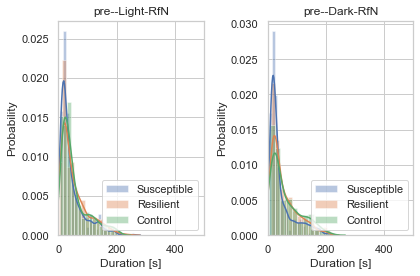

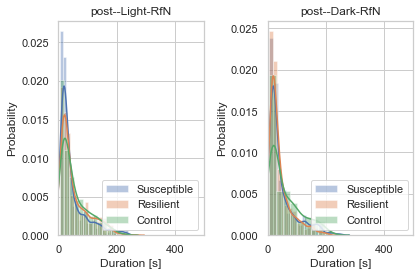

In [34]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'From'
state = 'REM'
transition = 'RfN'
measure = 'Duration'

for c in condition:
    i=1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plt_loop_over_phenotype_dist(p, c,state, direction, transition,measure)
        i+=1
    plt.tight_layout()    
    plt.show()          

#### Power Law distribution of Wake States

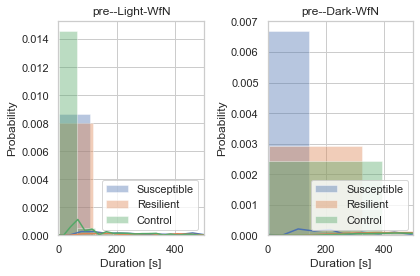

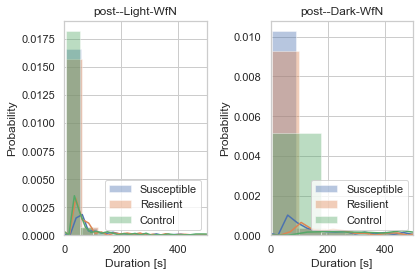

In [35]:
# Power law distribtion of Wake bouts
phase = ['Light','Dark']
condition =['pre','post']
direction = 'From'
state = 'Wake'
transition = 'WfN'
measure = 'Duration'

for c in condition:
    i=1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plt_loop_over_phenotype_dist(p, c,state, direction, transition,measure)
        i+=1
    plt.tight_layout()    
    plt.show()          

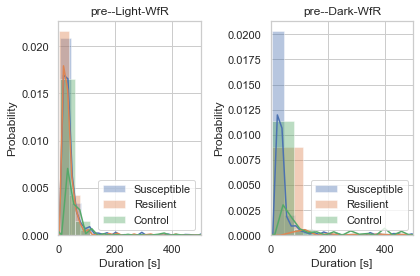

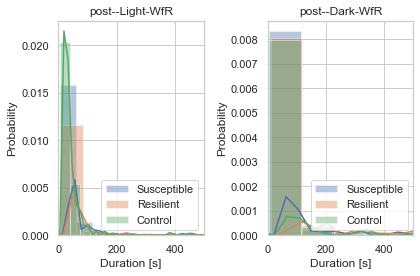

In [36]:
phase = ['Light','Dark']
condition =['pre','post']
direction = 'From'
state = 'Wake'
transition = 'WfR'
measure = 'Duration'

for c in condition:
    i=1
    for p in phase:
        _ = plt.subplot(1,2,i) 
        plt_loop_over_phenotype_dist(p, c,state, direction, transition,measure)
        i+=1
    plt.tight_layout()    
    plt.show()          

# % Duration, Count of states 

In [37]:
# Loading data frame of count, % count, total duration, % total duration of state transitions per mouse per phenotype per condition per phase
df_res = pd.read_csv('count+Dur_stateTransitions_0424.csv')


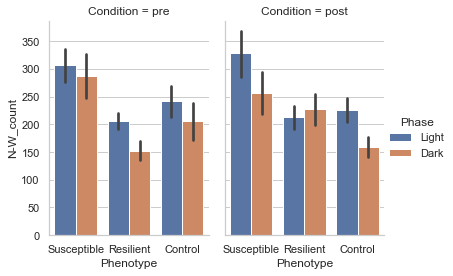

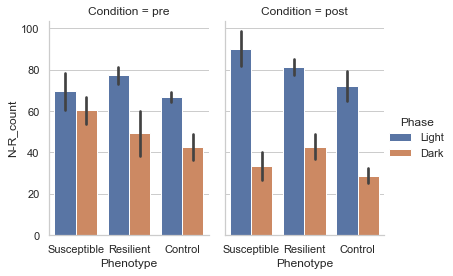

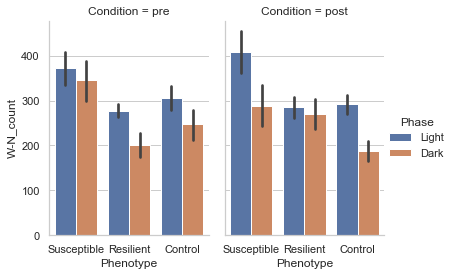

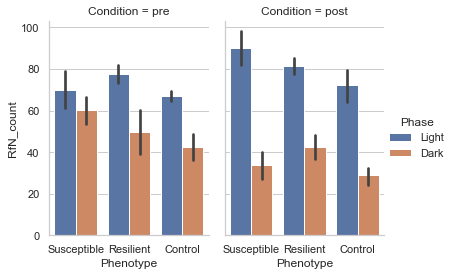

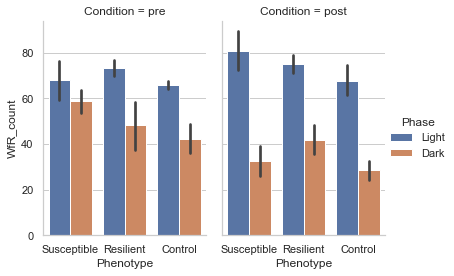

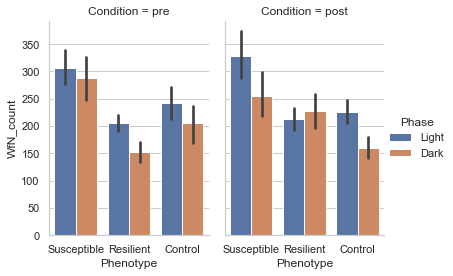

In [38]:
Trans_state =[ 'N-W_count','N-R_count','W-N_count','RfN_count','WfR_count','WfN_count']

for trans in Trans_state:
    g = sns.catplot(x='Phenotype',y = trans,
                hue = 'Phase', col = 'Condition',
                data = df_res, kind ="bar",
                height = 4, aspect = .7, ci =68) # standard error ci = 68 .. before it was showing standard deviation
    

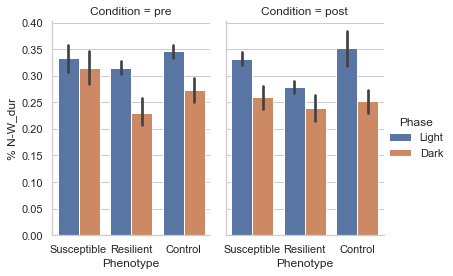

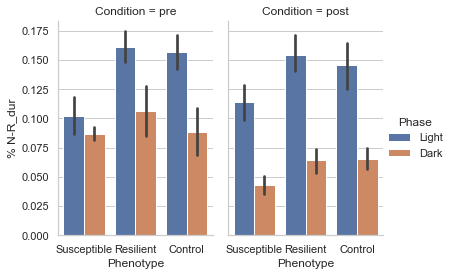

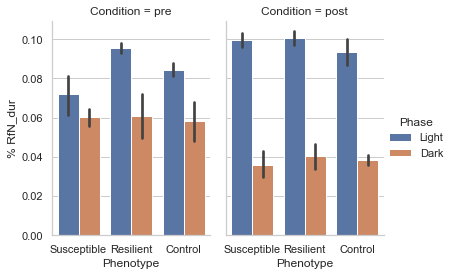

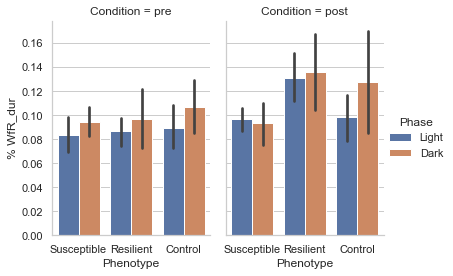

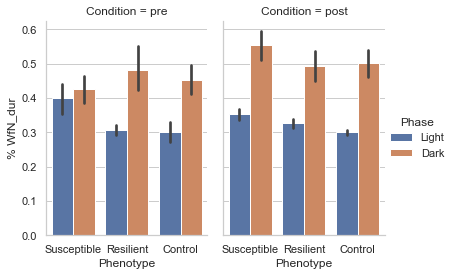

In [39]:
Trans_state =['% N-W_dur','% N-R_dur','% RfN_dur','% WfR_dur','% WfN_dur']
for trans in Trans_state:
    g = sns.catplot(x='Phenotype',y = trans,
                hue = 'Phase', col = 'Condition',
                data = df_res, kind ="bar",
                height = 4, aspect = .7, ci =68) # standard error ci = 68 .. before it was showing standard deviation
    

### % Duration across different conditions and phases

In [280]:
# Grouping by Phenotype
df_res_group = df_res.groupby(['Condition','Phase','Phenotype'])[['% N-W_dur','% N-R_dur','% WfN_dur','% WfR_dur','% RfN_dur']].mean()
df_res_group

% N-W_dur  % N-R_dur  % WfN_dur  % WfR_dur  \
Condition Phase Phenotype                                                 
post      Dark  Control       0.252199   0.065131   0.500999   0.127369   
                Resilient     0.239093   0.063954   0.492662   0.136014   
                Susceptible   0.259296   0.043218   0.553304   0.093099   
          Light Control       0.353039   0.145314   0.299418   0.098062   
                Resilient     0.278805   0.154002   0.325992   0.130715   
                Susceptible   0.332037   0.114203   0.351925   0.096706   
pre       Dark  Control       0.273476   0.088112   0.453790   0.106875   
                Resilient     0.230155   0.106214   0.482857   0.096726   
                Susceptible   0.314114   0.086723   0.425556   0.094577   
          Light Control       0.345830   0.156948   0.301088   0.089306   
                Resilient     0.314653   0.161285   0.306817   0.086421   
                Susceptible   0.333102   0.102269   0.399600   0.083638   

                             % RfN_dur  
Condition Phase Phenotype               
post      Dark  Control       0.038387  
                Resilient     0.040292  
                Susceptible   0.035979  
          Light Control       0.093492  
                Resilient     0.100457  
                Susceptible   0.099428  
pre       Dark  Control       0.058036  
                Resilient     0.061028  
                Susceptible   0.060370  
          Light Control       0.084372  
                Resilient     0.095518  
                Susceptible   0.072130

### Building dataframe structure to work with sns.catplot

In [355]:
phenotypes = ['Susceptible','Resilient','Control']
conditions = ['pre','post']
phases = ['Light','Dark']
Trans_state =['% N-W_dur','% N-R_dur','% RfN_dur','% WfR_dur','% WfN_dur']




phen_ =[]
c_    = []
ph_   = []
trans_dur =[]
#trans_count =[]
trans_label = []


for condition in conditions:
    for phase in phases:
        for phenotype in phenotypes:
            
            for i in range(5): 
                
                # Grouping df
                #percent duration
                df_res_group_dur = df_res.groupby(['Condition','Phase','Phenotype'])[Trans_state[i]].apply(list)
                
                
                l_ = df_res_group_dur.loc[condition].loc[phase].loc[phenotype]
                trans_dur.extend(l_)
                phen_.extend([phenotype]*len(l_))
                
                c_.extend([condition]*len(l_))
                ph_.extend([phase]*len(l_))
                label = Trans_state[i]
                label.replace('_dur','').replace('%','')
                trans_label.extend([label]*len(l_))
                
data =  {'Phenotype': phen_,
         'State_Dur': trans_dur,
         'Condition': c_,
         'Phase':ph_,
         'State_Trans':trans_label}
        
data_df = pd.DataFrame({ key:pd.Series(value) for key, value in data.items() })
  

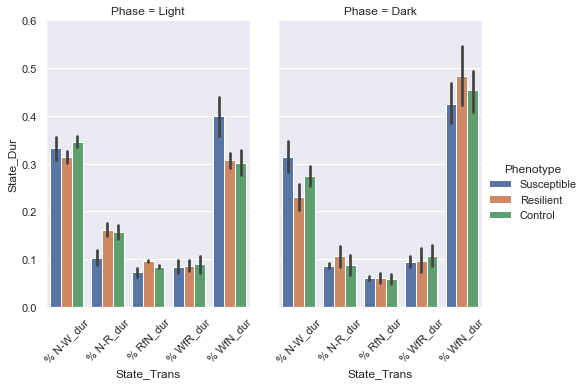

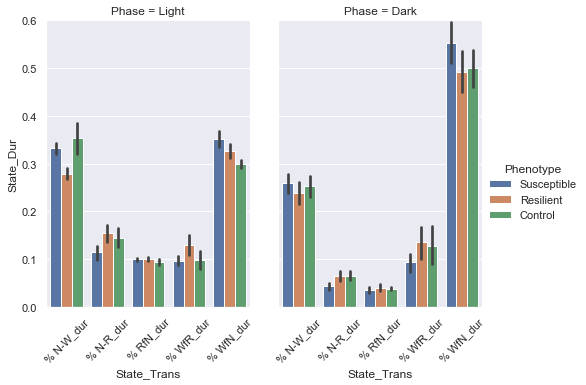

In [354]:
sns.set()
for condition in conditions:
    g = sns.catplot(x='State_Trans',y = 'State_Dur',
                hue = 'Phenotype', col = 'Phase',
                data = data_df[data_df['Condition']== condition], kind ="bar",
                 aspect = .7, ci =68) # standard error ci = 68 .. before it was showing standard deviation
    
    g.set(ylim=(0, 0.6))
    g.set_xticklabels(rotation=45)

### Much better choice over pie chart

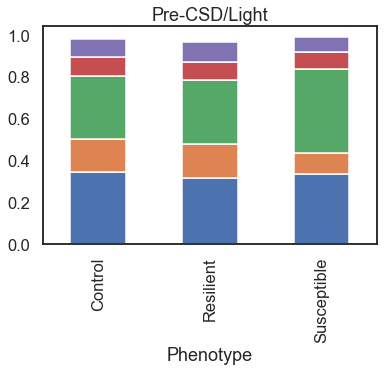

In [294]:
df_res_group = df_res.groupby(['Condition','Phase','Phenotype'])[['% N-W_dur','% N-R_dur','% WfN_dur','% WfR_dur','% RfN_dur']].mean()


# Pre-Light
#df_res_group
ax = df_res_group.loc['pre'].loc['Light'].plot(kind='bar',stacked = True)
ax.title.set_text('Pre-CSD/Light')
ax.legend_.remove()

# Blue N-W
# Orange N-R
# Green WfN 
# Red WfR
# Purple RfN

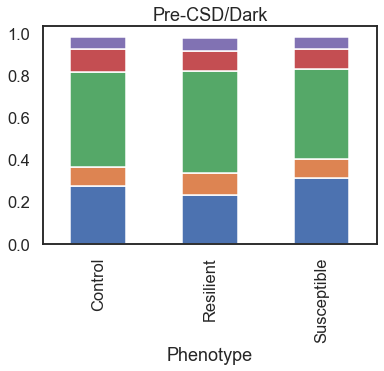

In [295]:
 # Pre-Dark
#df_res_group
ax = df_res_group.loc['pre'].loc['Dark'].plot(kind='bar',stacked = True)
ax.title.set_text('Pre-CSD/Dark')
ax.legend_.remove()

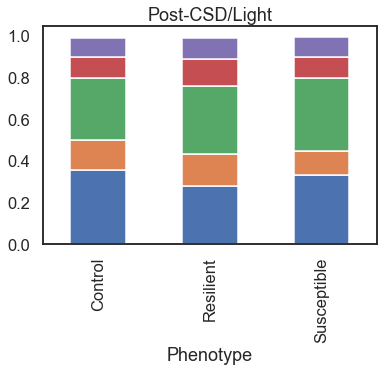

In [301]:
# Post-Light
#df_res_group
ax = df_res_group.loc['post'].loc['Light'].plot(kind='bar',stacked = True)
ax.title.set_text('Post-CSD/Light')
ax.legend_.remove()

# Blue N-W
# Orange N-R
# Green WfN 
# Red WfR
# Purple RfN

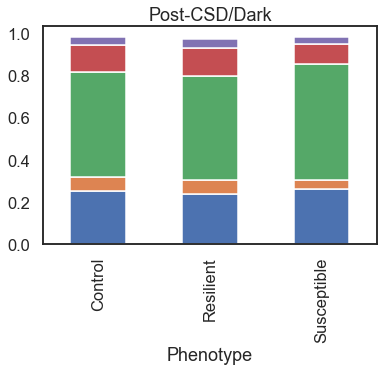

In [297]:
# Post-Dark
#df_res_group
ax = df_res_group.loc['post'].loc['Dark'].plot(kind='bar',stacked = True)
ax.title.set_text('Post-CSD/Dark')
ax.legend_.remove()

# Blue N-W
# Orange N-R
# Green WfN 
# Red WfR
# Purple RfN

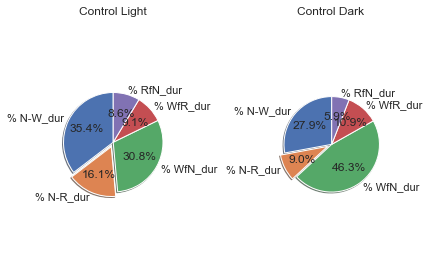

In [45]:
# Pie chart
# Control: L& Dark Pre
# Control: Light
states = ['% N-W_dur','% N-R_dur','% WfN_dur','% WfR_dur','% RfN_dur']
percent_time = [control_pre_light_series['% N-W_dur']*100,control_pre_light_series['% N-R_dur']*100,control_pre_light_series['% WfN_dur']*100,control_pre_light_series['% WfR_dur']*100,control_pre_light_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)
ax1.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Control Light')
plt.tight_layout()


#Control: Dark
percent_time = [control_pre_dark_series['% N-W_dur']*100,control_pre_dark_series['% N-R_dur']*100,control_pre_dark_series['% WfN_dur']*100,control_pre_dark_series['% WfR_dur']*100,control_pre_dark_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  

ax2 = fig1.add_subplot(1,2,2)
ax2.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.title('Control Dark')
plt.show()

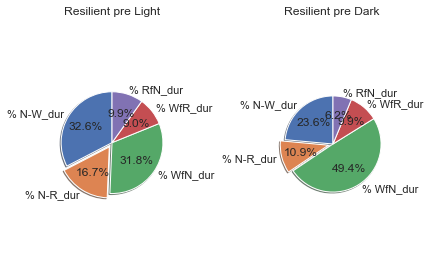

In [46]:
# Pie chart
# Resilient: L& Dark Pre
# Resilient: Light
states = ['% N-W_dur','% N-R_dur','% WfN_dur','% WfR_dur','% RfN_dur']
percent_time = [resilient_pre_light_series['% N-W_dur']*100,resilient_pre_light_series['% N-R_dur']*100,resilient_pre_light_series['% WfN_dur']*100,resilient_pre_light_series['% WfR_dur']*100,resilient_pre_light_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)
ax1.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Resilient pre Light')
plt.tight_layout()


#Resilient: Dark
percent_time = [resilient_pre_dark_series['% N-W_dur']*100,resilient_pre_dark_series['% N-R_dur']*100,resilient_pre_dark_series['% WfN_dur']*100,resilient_pre_dark_series['% WfR_dur']*100,resilient_pre_dark_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  

ax2 = fig1.add_subplot(1,2,2)
ax2.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.title('Resilient pre Dark')
plt.show()

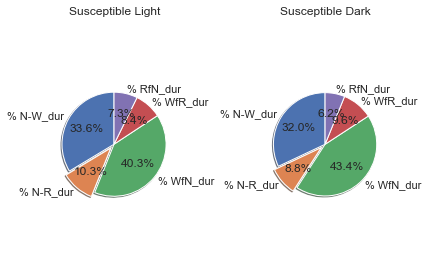

In [47]:
# Pie chart
# Susceptible: L& Dark Pre
# Susceptible: Light
states = ['% N-W_dur','% N-R_dur','% WfN_dur','% WfR_dur','% RfN_dur']
percent_time = [susceptible_pre_light_series['% N-W_dur']*100,susceptible_pre_light_series['% N-R_dur']*100,susceptible_pre_light_series['% WfN_dur']*100,susceptible_pre_light_series['% WfR_dur']*100,susceptible_pre_light_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)
ax1.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Susceptible Light')
plt.tight_layout()


#Susceptible: Dark
percent_time = [susceptible_pre_dark_series['% N-W_dur']*100,susceptible_pre_dark_series['% N-R_dur']*100,susceptible_pre_dark_series['% WfN_dur']*100,susceptible_pre_dark_series['% WfR_dur']*100,susceptible_pre_dark_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  

ax2 = fig1.add_subplot(1,2,2)
ax2.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.title('Susceptible Dark')
plt.show()

In [48]:
control_post_light_series = df_res_group.loc['Control'].loc['post'].loc['Light']
control_post_dark_series = df_res_group.loc['Control'].loc['post'].loc['Dark']

resilient_post_light_series = df_res_group.loc['Resilient'].loc['post'].loc['Light']
resilient_post_dark_series = df_res_group.loc['Resilient'].loc['post'].loc['Dark']


susceptible_post_light_series = df_res_group.loc['Susceptible'].loc['post'].loc['Light']
susceptible_post_dark_series = df_res_group.loc['Susceptible'].loc['post'].loc['Dark']

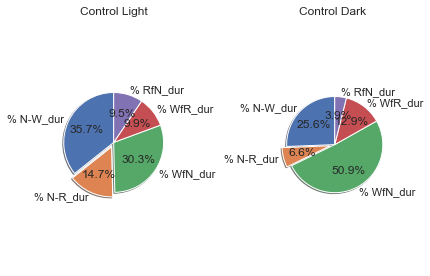

In [49]:
# Pie chart
# Control: L& Dark Post
# Control: Light
states = ['% N-W_dur','% N-R_dur','% WfN_dur','% WfR_dur','% RfN_dur']
percent_time = [control_post_light_series['% N-W_dur']*100,control_post_light_series['% N-R_dur']*100,control_post_light_series['% WfN_dur']*100,control_post_light_series['% WfR_dur']*100,control_post_light_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)
ax1.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Control Light')
plt.tight_layout()


#Control: Dark
percent_time = [control_post_dark_series['% N-W_dur']*100,control_post_dark_series['% N-R_dur']*100,control_post_dark_series['% WfN_dur']*100,control_post_dark_series['% WfR_dur']*100,control_post_dark_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  

ax2 = fig1.add_subplot(1,2,2)
ax2.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.title('Control Dark')
plt.show()

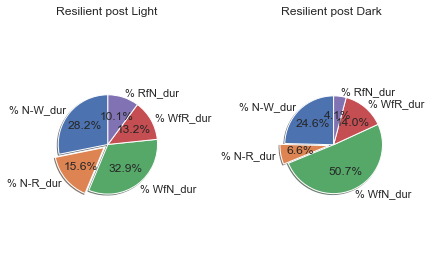

In [50]:
# Pie chart
# Resilient: L& Dark Post
# Resilient: Light
states = ['% N-W_dur','% N-R_dur','% WfN_dur','% WfR_dur','% RfN_dur']
percent_time = [resilient_post_light_series['% N-W_dur']*100,resilient_post_light_series['% N-R_dur']*100,resilient_post_light_series['% WfN_dur']*100,resilient_post_light_series['% WfR_dur']*100,resilient_post_light_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)
ax1.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Resilient post Light')
plt.tight_layout()


#Resilient: Dark
percent_time = [resilient_post_dark_series['% N-W_dur']*100,resilient_post_dark_series['% N-R_dur']*100,resilient_post_dark_series['% WfN_dur']*100,resilient_post_dark_series['% WfR_dur']*100,resilient_post_dark_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  

ax2 = fig1.add_subplot(1,2,2)
ax2.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.title('Resilient post Dark')
plt.show()

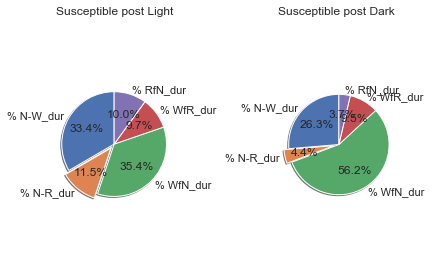

In [51]:
# Pie chart
# Susceptible: L& Dark Post
# Susceptible: Light
states = ['% N-W_dur','% N-R_dur','% WfN_dur','% WfR_dur','% RfN_dur']
percent_time = [susceptible_post_light_series['% N-W_dur']*100,susceptible_post_light_series['% N-R_dur']*100,susceptible_post_light_series['% WfN_dur']*100,susceptible_post_light_series['% WfR_dur']*100,susceptible_post_light_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)
ax1.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Susceptible post Light')
plt.tight_layout()


#Susceptible: Dark
percent_time = [susceptible_post_dark_series['% N-W_dur']*100,susceptible_post_dark_series['% N-R_dur']*100,susceptible_post_dark_series['% WfN_dur']*100,susceptible_post_dark_series['% WfR_dur']*100,susceptible_post_dark_series['% RfN_dur']*100 ]


# only "explode" the 2nd slice (i.e. '%N-R_dur')
explode = (0, 0.1, 0, 0,0)  

ax2 = fig1.add_subplot(1,2,2)
ax2.pie(percent_time, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.title('Susceptible post Dark')
plt.show()

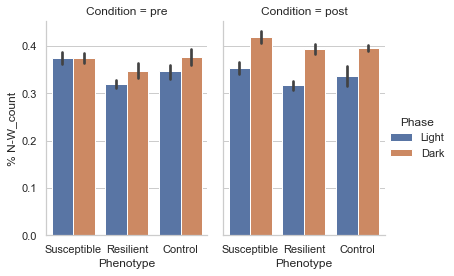

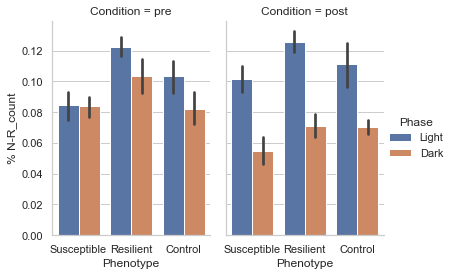

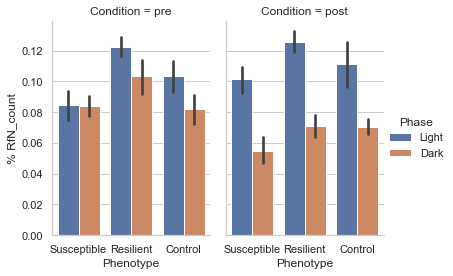

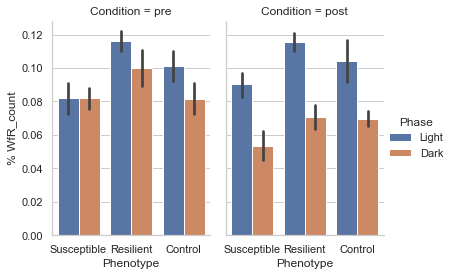

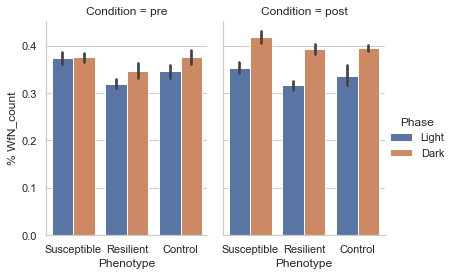

In [52]:
Trans_state =['% N-W_count','% N-R_count','% RfN_count','% WfR_count','% WfN_count']
for trans in Trans_state:
    g = sns.catplot(x='Phenotype',y = trans,
                hue = 'Phase', col = 'Condition',
                data = df_res, kind ="bar",
                height = 4, aspect = .7, ci =68) # standard error ci = 68 .. before it was showing standard deviation
    

# Survival Analysis

### Objective

Survival analysis allows to ' measure the probability that a given bout will survive long enough to reach a given duration, plotting the percentage of a state as a function of different bout length.'(Perez-Antencio, 2018).

In [222]:
# Function to plot Light and Dark Survival Curve Pre and Post exposure to Chronic Stress
sns.set_style('white') 
sns.set_context("talk")

def plot_surv_curves(state, direction, transition,measure):

    C_l = []  # condition
    Ph_l = [] # Phase
    Prob_dur = []
    Pheno_ = []
    
    for condition in ['pre','post']:
        P_l =[] # Phenotype
        E_l = [] # Event/Churn
        T_l = [] # Duration
        
    
        for phase in ['Light','Dark']: 
            P_l = []
            E_l = []
            T_l = []
            
            
            for phenotype in ['Susceptible','Resilient','Control']:
                df = load_data(phenotype,phase,condition)    
                df_grouped = grouping_data(df,direction,measure) 
                Dur_l = extract_list(df_grouped,state,transition) 
                events_l = [1]*len(Dur_l)
                phenotype_l = [phenotype]*len(Dur_l)
                
                T_l.extend(Dur_l)
                E_l.extend(events_l)
                P_l.extend(phenotype_l)
                
                C_l.append(condition)
                Ph_l.append(phase)
                
                data =  {'Epoch_Duration': T_l,
                         'Events': E_l ,
                         'Phenotype': P_l}
        
            data_df = pd.DataFrame({ key:pd.Series(value) for key, value in data.items() })

            T = data_df['Epoch_Duration']
            E = data_df['Events']
        
            groups = data_df['Phenotype']
            ix1 = (groups == 'Susceptible')
            ix2 = (groups == 'Resilient')
            ix3 = (groups == 'Control')
        
            kmf= KaplanMeierFitter()
            
            # Plot
            kmf.fit(T[ix1], E[ix1], label='Susceptible')
            ax = plt.subplots()
            ax = kmf.plot()
            #ax.set_yscale('log')
            ax.set_xlim([0,300])
            ax.set_title(condition + phase + transition)
            
            # Probability of reaching a duration 
            kmf.survival_function_.reset_index(inplace = True)
            dur_p = kmf.survival_function_[kmf.survival_function_['Susceptible'].round(1)==.5]['timeline'].values.mean()
            
            if  np.isnan(dur_p): # dur_p is empty
                dur_p = kmf.survival_function_[kmf.survival_function_['Susceptible'].round(1).between(0.3,0.5)]['timeline'].values.mean()
            
            Pheno_.append('S')
            Prob_dur.append(dur_p)
            
            
            kmf.fit(T[ix2], E[ix2], label='Resilient')
            ax1 = kmf.plot(ax = ax)
            
            # Probability of reaching a duration 
            kmf.survival_function_.reset_index(inplace = True)
            dur_p = kmf.survival_function_[kmf.survival_function_['Resilient'].round(1)==.5]['timeline'].values.mean()
            
            if  np.isnan(dur_p): # dur_p is empty
                dur_p = kmf.survival_function_[kmf.survival_function_['Resilient'].round(1).between(0.3,0.5)]['timeline'].values.mean()
            
            Pheno_.append('R')
            Prob_dur.append(dur_p)


            kmf.fit(T[ix3], E[ix3], label='Control')
            kmf.plot(ax = ax1)
            
            # Probability of reaching a duration 
            kmf.survival_function_.reset_index(inplace = True)
            dur_p = kmf.survival_function_[kmf.survival_function_['Control'].round(1)==.5]['timeline'].values.mean()
            
            if  np.isnan(dur_p): # dur_p is empty
                dur_p = kmf.survival_function_[kmf.survival_function_['Control'].round(1).between(0.3,0.5)]['timeline'].values.mean()
            
            Pheno_.append('C')
            Prob_dur.append(dur_p)
   
    data = {'Prob_Duration': Prob_dur,
          'Phase': Ph_l ,
          'Condition':C_l,
          'Phenotype': Pheno_}
        

    prob_dur_df = pd.DataFrame({ key:pd.Series(value) for key, value in data.items() }) 
    return prob_dur_df

In [223]:
from lifelines.statistics import logrank_test


def compute_logrank(state, direction, phase,condition, transition,measure):
    P_l = []
    E_l = []
    T_l = []

    
    for phenotype in ['Susceptible','Resilient','Control']:
        df = load_data(phenotype,phase,condition)    
        df_grouped = grouping_data(df,direction,measure) 
        Dur_l = extract_list(df_grouped,state,transition) 
        events_l = [1]*len(Dur_l)
        phenotype_l = [phenotype]*len(Dur_l)
        T_l.extend(Dur_l)
        E_l.extend(events_l)
        P_l.extend(phenotype_l)
        
        data =  {'Epoch_Duration': T_l,
                 'Events': E_l ,
                 'Phenotype': P_l}
        
        data_df = pd.DataFrame({ key:pd.Series(value) for key, value in data.items() })

        T = data_df['Epoch_Duration']
        E = data_df['Events']
        
        groups = data_df['Phenotype']
        ix1 = (groups == 'Susceptible')
        ix2 = (groups == 'Resilient')
        ix3 = (groups == 'Control')
        
        
    print('Comparing S and C')        
    results = logrank_test(T[ix1],T[ix3],E[ix1],E[ix3])  # Comparison between S&C
    results.print_summary()
    print('Comparing S and R')
    results1 = logrank_test(T[ix1],T[ix2],E[ix1],E[ix2]) # Comparison between S&R
    results1.print_summary()
    print ('Comparing R and C')
    results2 = logrank_test(T[ix2],T[ix3],E[ix2],E[ix3]) # Comparison between R&C
    results2.print_summary()
            
    

### Plotting survival curves + computing 50% survival duration of a state

,Prob_Duration,Phase,Condition,Phenotype
0,51.750000,Light,pre,S
1,72.333333,Light,pre,R
2,82.000000,Light,pre,C
3,52.000000,Dark,pre,S
4,72.500000,Dark,pre,R
5,71.000000,Dark,pre,C
6,40.000000,Light,post,S
7,57.500000,Light,post,R
8,67.500000,Light,post,C
9,45.000000,Dark,post,S


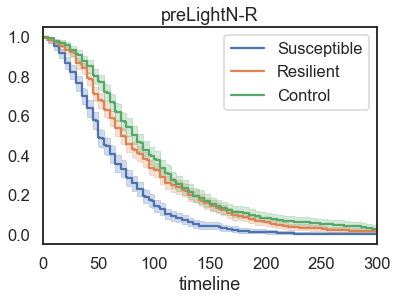

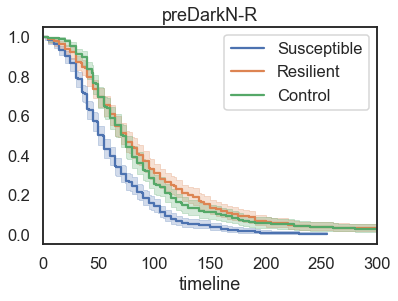

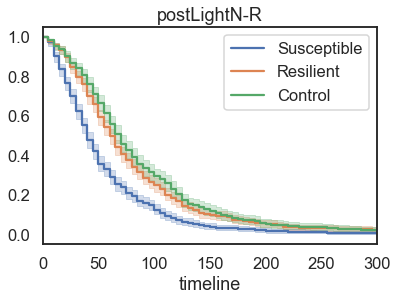

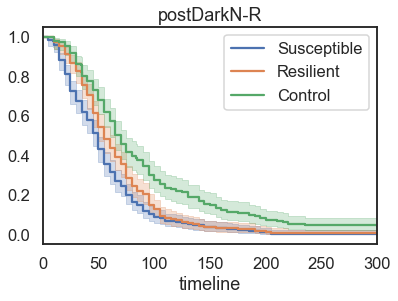

In [215]:
measure = 'Duration'
direction ='To'
state = 'NREM'
transition = 'N-R'

plot_surv_curves(state, direction, transition,measure)


,Prob_Duration,Phase,Condition,Phenotype
0,36.000000,Light,pre,S
1,49.111111,Light,pre,R
2,44.666667,Light,pre,C
3,33.857143,Dark,pre,S
4,43.625000,Dark,pre,R
5,39.714286,Dark,pre,C
6,29.666667,Light,post,S
7,37.500000,Light,post,R
8,47.333333,Light,post,C
9,30.000000,Dark,post,S


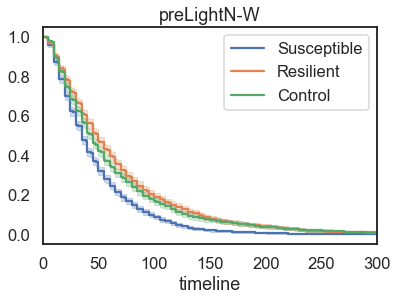

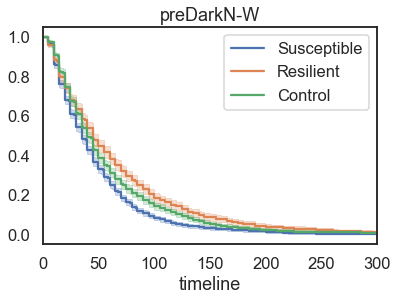

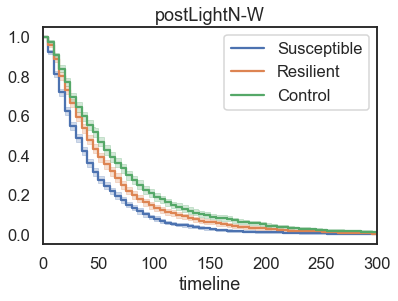

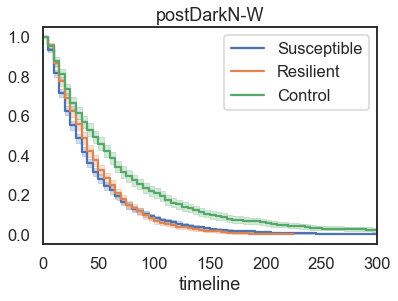

In [216]:
direction ='To'
state = 'NREM'
transition = 'N-W'

plot_surv_curves(state, direction, transition,measure)

,Prob_Duration,Phase,Condition,Phenotype
0,26.000000,Light,pre,S
1,34.166667,Light,pre,R
2,36.500000,Light,pre,C
3,25.000000,Dark,pre,S
4,32.500000,Dark,pre,R
5,37.000000,Dark,pre,C
6,25.000000,Light,post,S
7,30.000000,Light,post,R
8,35.000000,Light,post,C
9,25.000000,Dark,post,S


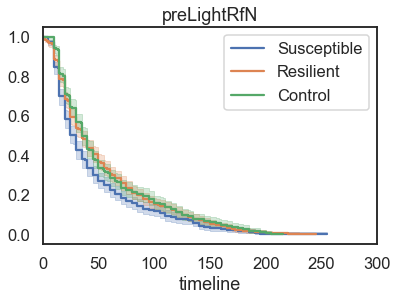

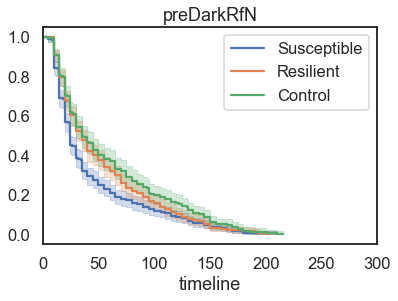

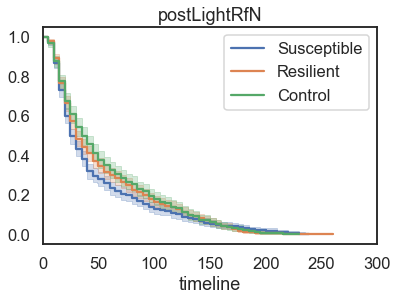

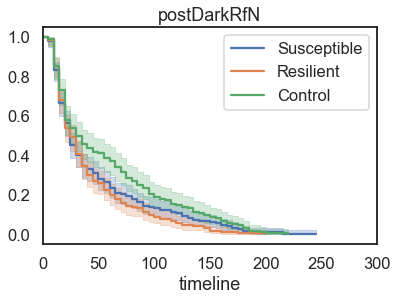

In [190]:
direction ='From'
state = 'REM'
transition = 'RfN'

plot_surv_curves(state, direction, transition,measure)

,Prob_Duration,Phase,Condition,Phenotype
0,14.666667,Light,pre,S
1,14.000000,Light,pre,R
2,14.333333,Light,pre,C
3,14.166667,Dark,pre,S
4,12.000000,Dark,pre,R
5,12.000000,Dark,pre,C
6,18.000000,Light,post,S
7,15.000000,Light,post,R
8,10.000000,Light,post,C
9,22.500000,Dark,post,S


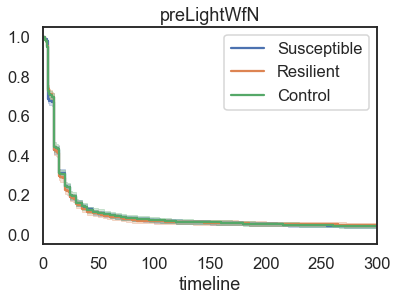

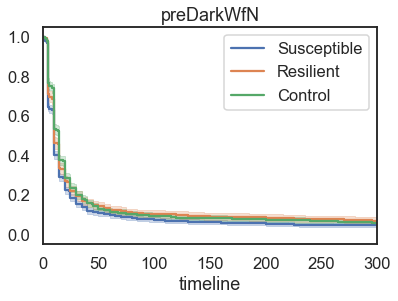

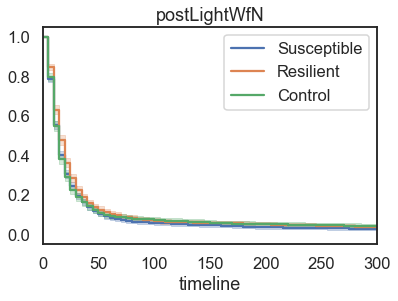

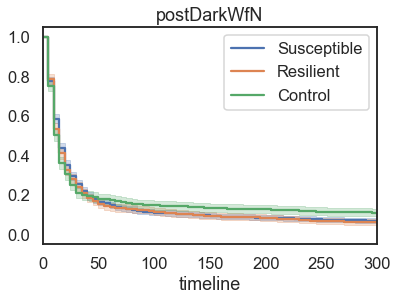

In [224]:
direction ='From'
state = 'Wake'
transition = 'WfN'

plot_surv_curves(state, direction, transition,measure)


,Prob_Duration,Phase,Condition,Phenotype
0,30.00,Light,pre,S
1,22.25,Light,pre,R
2,22.00,Light,pre,C
3,22.00,Dark,pre,S
4,21.00,Dark,pre,R
5,25.00,Dark,pre,C
6,25.00,Light,post,S
7,37.50,Light,post,R
8,25.00,Light,post,C
9,25.00,Dark,post,S


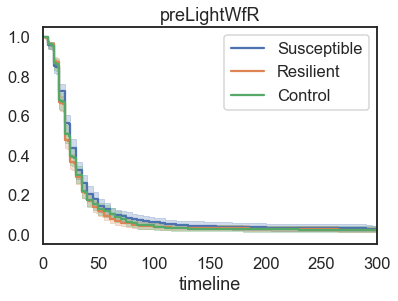

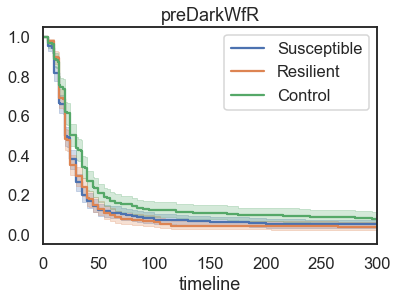

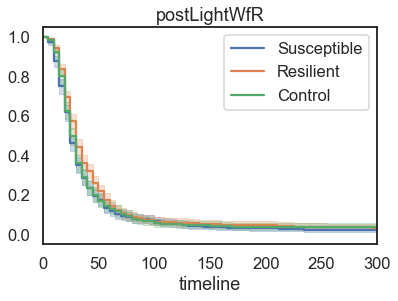

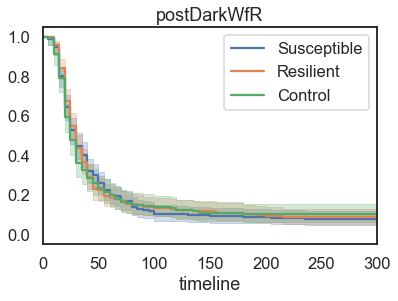

In [225]:
direction ='From'
state = 'Wake'
transition = 'WfR'

plot_surv_curves(state, direction, transition,measure)


### Logrank Test

#### REM states transitioning from NREM

In [200]:
#logrank_test

phase = 'Light'
condition = 'pre'
direction ='From'
state = 'REM'
transition = 'RfN'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


In [201]:
#logrank_test

phase = 'Dark'
condition = 'pre'
direction ='From'
state = 'REM'
transition = 'RfN'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


In [199]:
#logrank_test

phase = 'Light'
condition = 'post'
direction ='From'
state = 'REM'
transition = 'RfN'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


In [198]:
#logrank_test

phase = 'Dark'
condition = 'post'
direction ='From'
state = 'REM'
transition = 'RfN'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


#### NREM to Wake

In [202]:
#logrank_test

phase = 'Light'
condition = 'pre'
direction ='To'
state = 'NREM'
transition = 'N-W'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


In [203]:
#logrank_test

phase = 'Dark'
condition = 'pre'
direction ='To'
state = 'NREM'
transition = 'N-W'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


In [204]:
#logrank_test

phase = 'Light'
condition = 'post'
direction ='To'
state = 'NREM'
transition = 'N-W'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


In [205]:
#logrank_test

phase = 'Dark'
condition = 'post'
direction ='To'
state = 'NREM'
transition = 'N-W'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


### NREM to REM

In [206]:
#logrank_test

phase = 'Light'
condition = 'pre'
direction ='To'
state = 'NREM'
transition = 'N-R'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


In [207]:
#logrank_test

phase = 'Dark'
condition = 'pre'
direction ='To'
state = 'NREM'
transition = 'N-R'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


In [208]:
#logrank_test

phase = 'Light'
condition = 'post'
direction ='To'
state = 'NREM'
transition = 'N-R'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


In [209]:
#logrank_test

phase = 'Dark'
condition = 'post'
direction ='To'
state = 'NREM'
transition = 'N-R'

compute_logrank(state, direction, phase,condition, transition,measure)

Comparing S and C


Comparing S and R


Comparing R and C


# Cox Proportional Hazard Model (Survival Regression)
To model the impact of covariates on the survival curve

Covariates: 
- condition: pre and post
- phase: light and dark
- Susceptiblity to stress versus Resilience
- Vulnerability to stress


#### Data is uncensored

### NREM to Wake

In [72]:
def state_across_cond_phase(state,direction,measure,transition):
    P_l =[]
    E_l = []
    T_l = []
    Ph_l = []
    C_l = []

    for condition in ['pre','post']:
       
        for phase in ['Light','Dark']: 
       

            for phenotype in ['Susceptible','Resilient','Control']:
                df = load_data(phenotype,phase,condition)    
                df_grouped = grouping_data(df,direction,measure) 
                Dur_l = extract_list(df_grouped,state,transition) # 
                events_l = [1]*len(Dur_l)# Churn
                phenotype_l = [phenotype]*len(Dur_l)
                condition_l = [condition]*len(Dur_l)
                phase_l = [phase]*len(Dur_l)
                T_l.extend(Dur_l)
                E_l.extend(events_l)
                P_l.extend(phenotype_l)
                Ph_l.extend(phase_l)
                C_l.extend(condition_l)
        
                data =    {'Duration': T_l,
                           'Churn': E_l ,
                           'Phenotype': P_l,
                           'Phase': Ph_l,
                           'Condition': C_l}
        
    data_df = pd.DataFrame({ key:pd.Series(value) for key, value in data.items() })
    return data_df
            

In [73]:
state = 'NREM'
direction = 'To'
measure = 'Duration'
transition = 'N-W'

data_df = state_across_cond_phase(state,direction,measure,transition)

In [74]:
 data_df

,Duration,Churn,Phenotype,Phase,Condition
0,60,1,Susceptible,Light,pre
1,30,1,Susceptible,Light,pre
2,25,1,Susceptible,Light,pre
3,15,1,Susceptible,Light,pre
4,65,1,Susceptible,Light,pre
...,...,...,...,...,...
19455,95,1,Control,Dark,post
19456,5,1,Control,Dark,post
19457,40,1,Control,Dark,post
19458,25,1,Control,Dark,post


In [69]:
## Create dummy variables
data_df_dummy = pd.get_dummies(data_df,prefix =['Phenotype','Phase','Condition'],drop_first = True)
data_df_dummy.head()

,Duration,Churn,Phenotype_Resilient,Phenotype_Susceptible,Phase_Light,Condition_pre
0,60,1,0,1,1,1
1,30,1,0,1,1,1
2,25,1,0,1,1,1
3,15,1,0,1,1,1
4,65,1,0,1,1,1


In [70]:
# Using Cox Proportional Hazards model
from lifelines import CoxPHFitter
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(data_df_dummy, 'Duration', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## Displaying the significance of the features

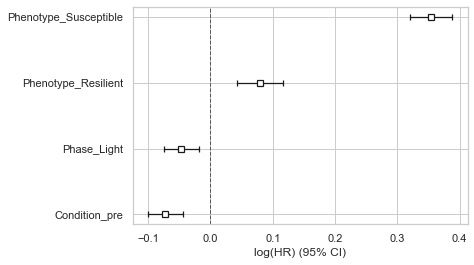

In [66]:
cph.plot()

### NREM to REM

In [79]:
state = 'NREM'
direction = 'To'
measure = 'Duration'
transition = 'N-R'

data_df = state_across_cond_phase(state,direction,measure,transition)
data_df_dummy = pd.get_dummies(data_df,prefix =['Phenotype','Phase','Condition'],drop_first = True)
data_df_dummy.head()

,Duration,Churn,Phenotype_Resilient,Phenotype_Susceptible,Phase_Light,Condition_pre
0,65,1,0,1,1,1
1,50,1,0,1,1,1
2,135,1,0,1,1,1
3,50,1,0,1,1,1
4,20,1,0,1,1,1


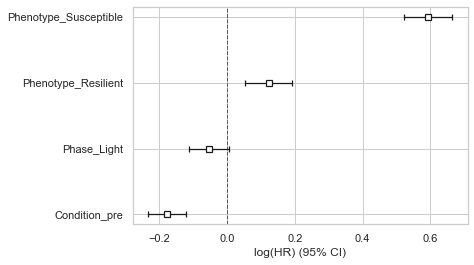

In [80]:
cph.fit(data_df_dummy, 'Duration', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## Displaying the significance of the features
cph.plot()

### REM from NREM 

In [86]:
state = 'REM'
direction = 'From'
measure = 'Duration'
transition = 'RfN'

data_df = state_across_cond_phase(state,direction,measure,transition)
data_df_dummy = pd.get_dummies(data_df,prefix =['Phenotype','Phase','Condition'],drop_first = True)
data_df_dummy.head()

,Duration,Churn,Phenotype_Resilient,Phenotype_Susceptible,Phase_Light,Condition_pre
0,15,1,0,1,1,1
1,140,1,0,1,1,1
2,30,1,0,1,1,1
3,10,1,0,1,1,1
4,190,1,0,1,1,1


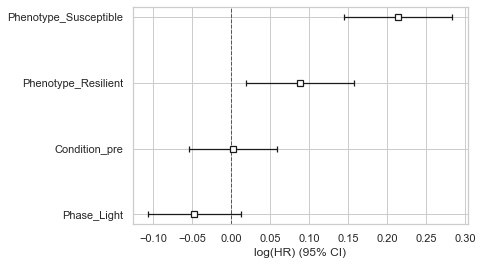

In [87]:
cph.fit(data_df_dummy, 'Duration', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## Displaying the significance of the features
cph.plot()

### Wake from NREM

In [88]:
state = 'Wake'
direction = 'From'
measure = 'Duration'
transition = 'WfN'

data_df = state_across_cond_phase(state,direction,measure,transition)
data_df_dummy = pd.get_dummies(data_df,prefix =['Phenotype','Phase','Condition'],drop_first = True)
data_df_dummy.head()

,Duration,Churn,Phenotype_Resilient,Phenotype_Susceptible,Phase_Light,Condition_pre
0,5,1,0,1,1,1
1,5,1,0,1,1,1
2,5,1,0,1,1,1
3,5,1,0,1,1,1
4,5,1,0,1,1,1


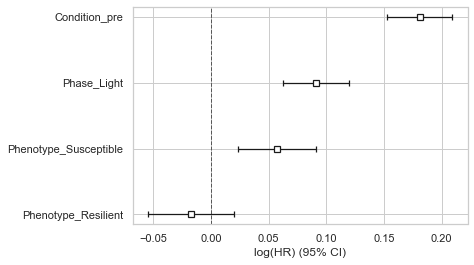

In [89]:
cph.fit(data_df_dummy, 'Duration', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## Displaying the significance of the features
cph.plot()

### Wake from REM

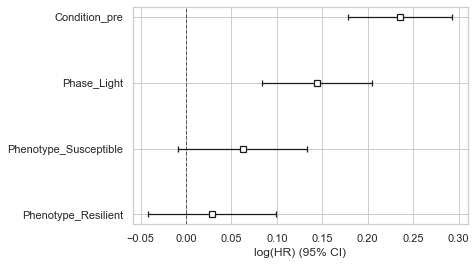

In [90]:
state = 'Wake'
direction = 'From'
measure = 'Duration'
transition = 'WfR'

data_df = state_across_cond_phase(state,direction,measure,transition)
data_df_dummy = pd.get_dummies(data_df,prefix =['Phenotype','Phase','Condition'],drop_first = True)
data_df_dummy.head()


cph.fit(data_df_dummy, 'Duration', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## Displaying the significance of the features
cph.plot()